In [2]:
pip install fbprophet

In [3]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [136]:
import numpy as np
import os
import pandas as pd
import urllib
from datetime import datetime
from pathlib import Path 
import matplotlib.pyplot as plt
from fbprophet import Prophet
import csv

In [137]:
Facebook = yf.Ticker("FB")

In [127]:
df = yf.download("FB", start="2018-02-19", end="2022-02-19")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,175.770004,177.949997,175.110001,176.009995,176.009995,21204900
2018-02-21,176.710007,181.270004,176.399994,177.910004,177.910004,23200800
2018-02-22,178.699997,180.210007,177.410004,178.990005,178.990005,18464200
2018-02-23,179.899994,183.389999,179.509995,183.289993,183.289993,19007300
2018-02-26,184.580002,185.660004,183.220001,184.929993,184.929993,17599700


In [128]:
df = df.drop(columns='Open')
df.head()

,High,Low,Close,Adj Close,Volume
Date,,,,,
2018-02-20,177.949997,175.110001,176.009995,176.009995,21204900
2018-02-21,181.270004,176.399994,177.910004,177.910004,23200800
2018-02-22,180.210007,177.410004,178.990005,178.990005,18464200
2018-02-23,183.389999,179.509995,183.289993,183.289993,19007300
2018-02-26,185.660004,183.220001,184.929993,184.929993,17599700


In [129]:
df = df.drop(columns='High')
df.head()

,Low,Close,Adj Close,Volume
Date,,,,
2018-02-20,175.110001,176.009995,176.009995,21204900
2018-02-21,176.399994,177.910004,177.910004,23200800
2018-02-22,177.410004,178.990005,178.990005,18464200
2018-02-23,179.509995,183.289993,183.289993,19007300
2018-02-26,183.220001,184.929993,184.929993,17599700


In [130]:
df = df.drop(columns='Low')
df.head()

,Close,Adj Close,Volume
Date,,,
2018-02-20,176.009995,176.009995,21204900
2018-02-21,177.910004,177.910004,23200800
2018-02-22,178.990005,178.990005,18464200
2018-02-23,183.289993,183.289993,19007300
2018-02-26,184.929993,184.929993,17599700


In [131]:
df = df.drop(columns='Adj Close')
df.head()

,Close,Volume
Date,,
2018-02-20,176.009995,21204900
2018-02-21,177.910004,23200800
2018-02-22,178.990005,18464200
2018-02-23,183.289993,19007300
2018-02-26,184.929993,17599700


In [132]:
df = df.drop(columns='Volume')
df.head()

,Close
Date,
2018-02-20,176.009995
2018-02-21,177.910004
2018-02-22,178.990005
2018-02-23,183.289993
2018-02-26,184.929993


In [119]:
df_facebook.head()

,Date,High,Low,Close,Adj Close,Volume
0,2018-02-20,177.949997,175.110001,176.009995,176.009995,21204900
1,2018-02-21,181.270004,176.399994,177.910004,177.910004,23200800
2,2018-02-22,180.210007,177.410004,178.990005,178.990005,18464200
3,2018-02-23,183.389999,179.509995,183.289993,183.289993,19007300
4,2018-02-26,185.660004,183.220001,184.929993,184.929993,17599700


In [133]:
df.reset_index(inplace=True)
df.head()


,Date,Close
0,2018-02-20,176.009995
1,2018-02-21,177.910004
2,2018-02-22,178.990005
3,2018-02-23,183.289993
4,2018-02-26,184.929993


In [134]:
# Select only the important features i.e. the date and price
df = df[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
df.head()

,ds,y
0,2018-02-20,176.009995
1,2018-02-21,177.910004
2,2018-02-22,178.990005
3,2018-02-23,183.289993
4,2018-02-26,184.929993


In [141]:
df.head()

,ds,y
0,2018-02-20,176.009995
1,2018-02-21,177.910004
2,2018-02-22,178.990005
3,2018-02-23,183.289993
4,2018-02-26,184.929993


In [142]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

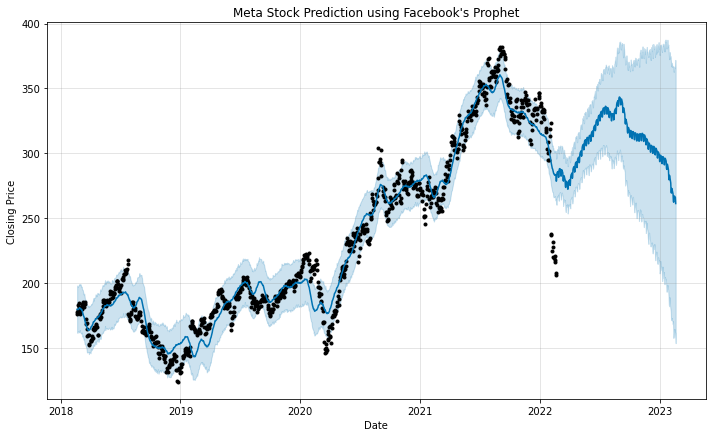

In [147]:
# 1 Year Stock Prediction
future = m.make_future_dataframe(periods=365) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Meta (1 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction)
plt.show()

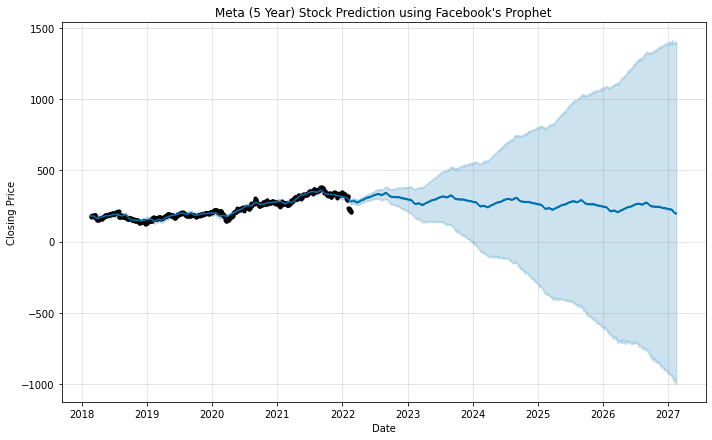

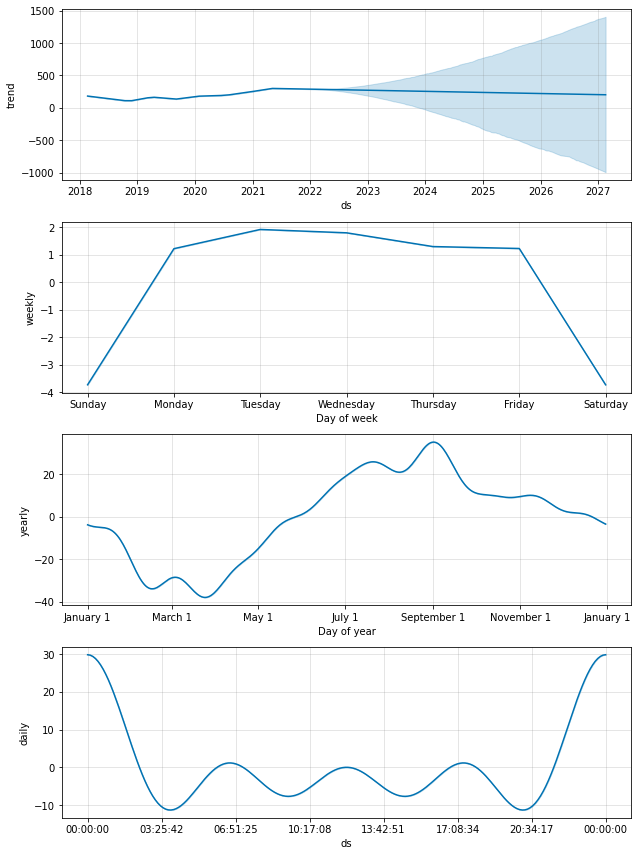

In [148]:
# 5 Year Stock Prediction
future = m.make_future_dataframe(periods=1825) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Meta (5 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction)
plt.show()

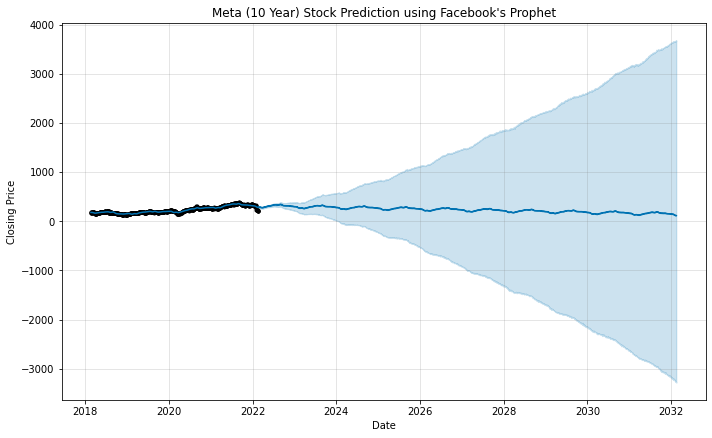

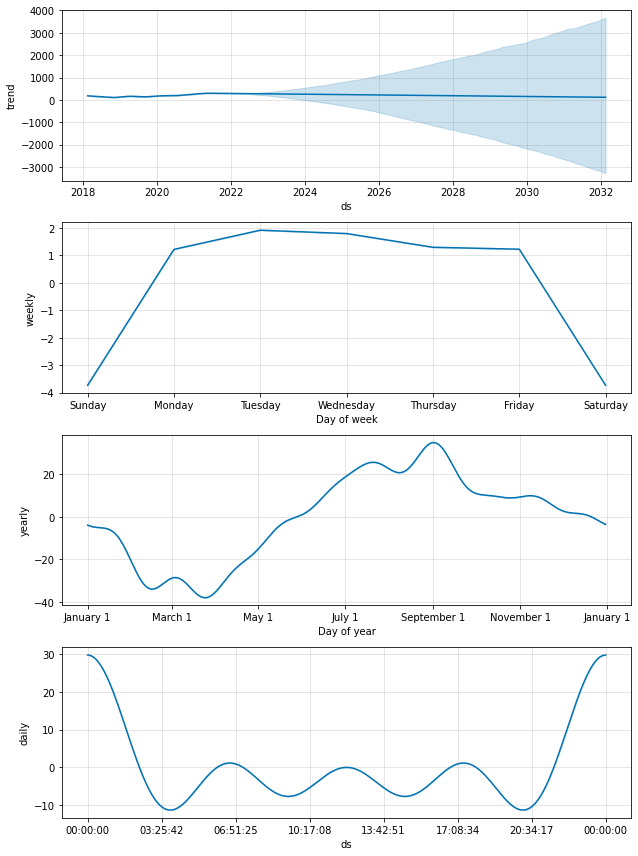

In [149]:
# 10 Year Stock Prediction
future = m.make_future_dataframe(periods=3650) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Meta (10 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction)
plt.show()

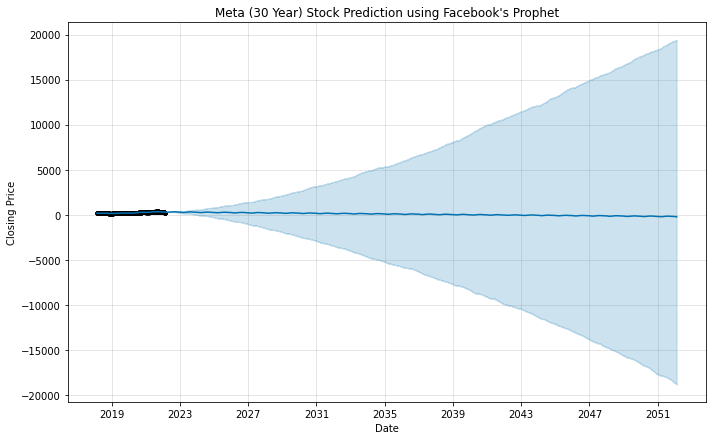

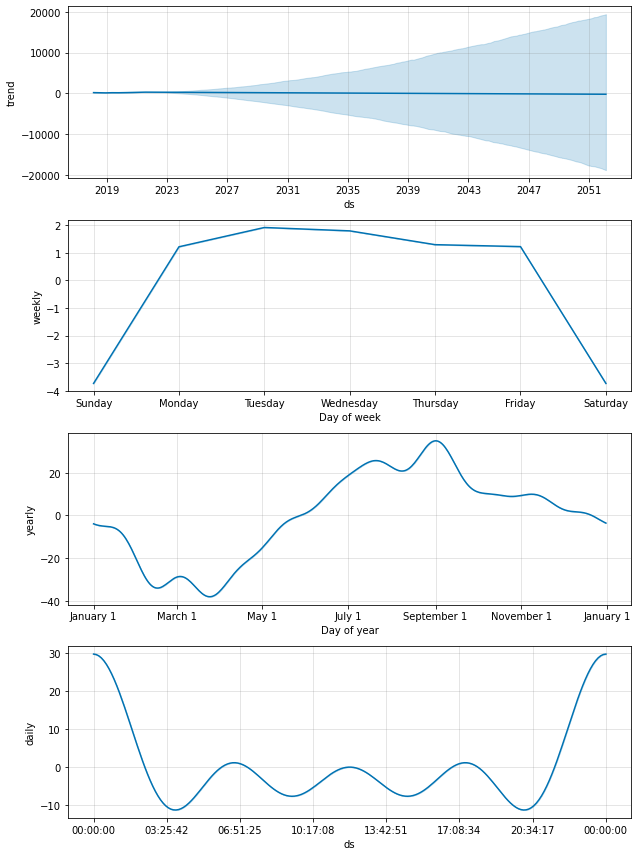

In [150]:
# 30 Year Stock Prediction
future = m.make_future_dataframe(periods=10950) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Meta (30 Year) Stock Prediction using Facebook's Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Plot components 
m.plot_components(prediction)
plt.show()